## Linear Regression(선형 회귀 모델)

[scikit-learn 공식문서](https://scikit-learn.org/stable/index.html)


## 보스턴 주택가격 예측모델

### 보스턴 주택가격 데이터셋 로드
- 13개의 Feature가 있으며 주택가격을 레이블로 한 회귀분석용 데이터셋

In [1]:
# scikit-learn 공식문서에서 dataset 검색
# 최상단 sklearn.datasets 진입
# datasets.load_boston 클릭하면 해당 데이터에 대한 정보 확인 가능

In [2]:
import pandas as pd 
from sklearn.datasets import load_boston
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 데이터 불러오기
boston = load_boston()
boston

# iris 데이터와 유사한 구조의 dictionary
# 머신러닝 데이터는 data, target 따로 구분되어 존재

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# boston의 description 출력 (컬럼명: DESCR)
print(boston['DESCR'])

# MEDV: 주택 가격

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# data를 데이터프레임(df_boston)으로 저장
df_boston = pd.DataFrame(boston['data'], columns=boston.feature_names) # boston.data

# target 값을 df_boston의 PRICE 컬럼에 삽입
df_boston['PRICE'] = boston.target

In [6]:
# df_boston 데이터프레임의 크기 확인
df_boston.shape

(506, 14)

In [7]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



#### 타겟(target) 데이터
 - 1978 보스턴 주택 가격
 - 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

#### 특징(feature) 데이터
 - CRIM: 범죄율
 - ZN: 25,000 평방 피트 당 주거용 토지의 비율
 - INDUS: 비소매상업지역 면적 비율
 - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0(통로가 하천을 향하면1, 아니면 0)
 - NOX: 일산화질소 농도(천만분의 1)
 - RM: 주택당 방 수
 - AGE: 1940년 이전에 건축된 주택의 비율
 - DIS: 5개 주요 고용센터까지의 가중거리
 - RAD: 고속도로 접근성 지수
 - TAX: 재산세율
 - PTRATIO: 학생/교사 비율
 - B: 인구 중 흑인 거주 비율
 - LSTAT: 인구 중 하위 계층 비율
 




In [8]:
# df_boston의 통계값 확인
df_boston.describe() # 수치형 자료의 통계값만 확인 가능

# 머신러닝 데이터는 모두 수치형이므로 전체 데이터셋 포함
# pandas 분석 데이터의 경우 문자형 범주 데이터는 포함되지 않을 수 있음

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

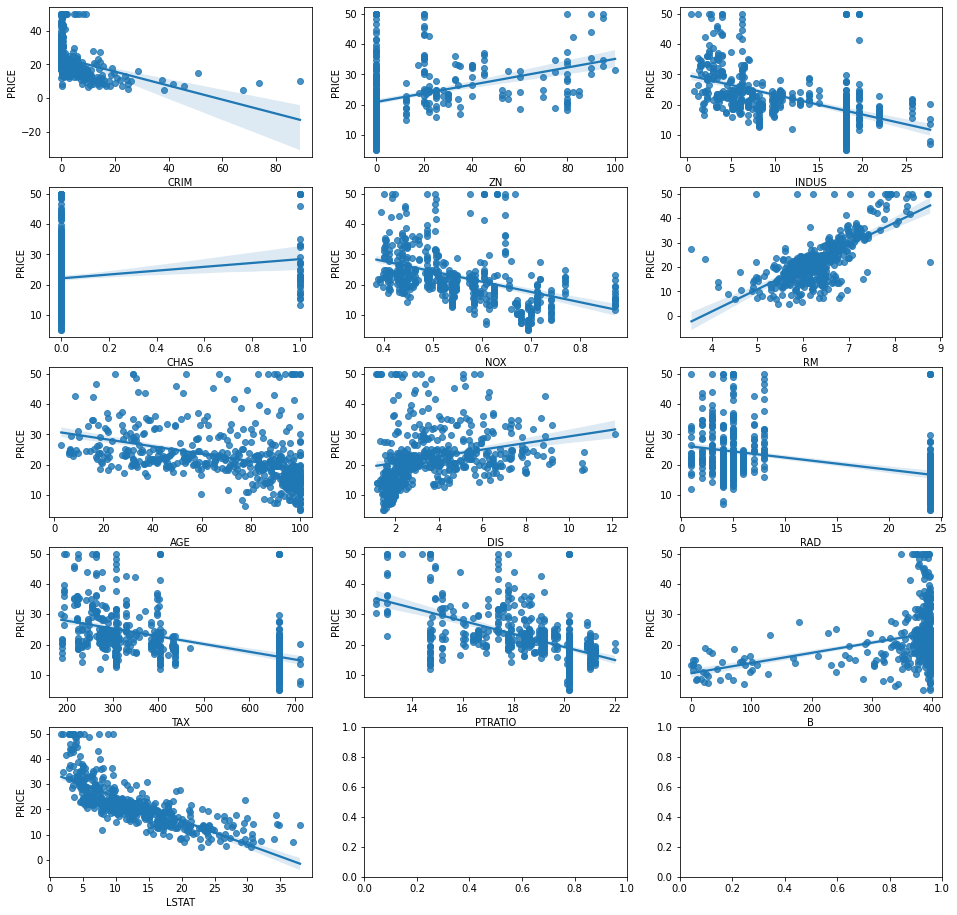

In [10]:
fig, axs = plt.subplots(5, 3, figsize=(16, 16))

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

axes =  axs.flatten() # 5행 3열의 figure에 1차원 인덱싱 적용 가능하도록

# 2차원 figure의 경우 특정 ax에 axs[0,0], axs[4, 2] 이런 식으로 접근
# 이 경우 하단의 for문을 두 번 돌려야 한다는 단점

# 아래와 같이 1차원 인덱스 부여
# 0 1 2
# 3 4 5
# ...
# 12 13 14

# 실제 5행 3열의 형태가 1차원으로 변환되는 것은 아니지만,
# 2차원 인덱싱 과정에서 발생하는 번거로움 감소 (for문 하나로 충분)

for idx, feature in enumerate(x_features): # enumerate는 인자의 자료 + 인덱스 값까지 반환
    sns.regplot(x=feature, y='PRICE', data= df_boston, ax=axes[idx])

# regplot -> regression plot: 회귀선을 그려주는 함수
# 1행 1열 그래프 보면 CRIM, PRICE는 음의 상관관계
# 점의 분포와 직선(추세선)이 어느정도 일치하는 그래프는 2행 3열의 RM 그래프와 5행 1열의 LSTAT 그래프

###  데이터 세트 분할(train_test_split)



In [11]:
# 이미 정제된 데이터이므로 전처리 과정 없이 데이터 분할부터 시작

# import train_test_split
from sklearn.model_selection import train_test_split

In [12]:
# train_test_split는 feature, target 데이터 인자를 따로 받음
# 데이터 분할에 앞서 정답 데이터와 feature 데이터를 서로 다른 변수에 할당

# df_boston의 레이블을 y_target에 저장
y_target = df_boston['PRICE']

# df_boston의 features를 x_data에 저장
x_data = df_boston.drop(['PRICE'], axis=1)

# 데이터분할 저장 변수: x_train, x_test, y_train, y_test
# 데이터분할: test_size 30%, random_state=156
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target,
                                                   test_size=0.3,
                                                   random_state=156)

In [13]:
x_train.shape, y_train.shape

((354, 13), (354,))

### 모델 생성 및 학습
- [Document](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [14]:
# 선형 회귀 알고리즘 사용
from sklearn.linear_model import LinearRegression

In [15]:
# LinearRegression 객체 생성
lr = LinearRegression()

# 모델 학습
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리는 함수
def plot_pred_actual(pred, actual):
    
    df = pd.DataFrame({'prediction': pred, 'actual': y_test}) # 예측값과 실제값 그래프
    df = df.sort_values(by='actual').reset_index(drop=True) # 실제값 기준으로 데이터프레임 정렬

    plt.figure(figsize=(8, 6))
    
    # matplotlib의 scatter plot -> x축: df.index, y축: 예측값, marker: x, color: red
    plt.scatter(df.index, df.prediction, marker='x', color='r')
    
    # matplotlib의 scatter plot -> x축: df.index, y축: 실제값, alpha: 0.5, marker: o, color: blue
    # alpha -> 투명도, 두 산점도의 점이 겹치면 하나가 가려질 수 있으므로 투명도 조절
    plt.scatter(df.index, df.actual, alpha=0.5, marker='o', color='b')

    # title: Linear Regression, fontsize: 15
    plt.title('Linear Regression', fontsize=15)

    # legend: prediction, actual, fontsize: 12
    plt.legend(['prediction', 'actual'], fontsize=12)


###  보스턴 주택가격 예측 모델


In [17]:
# 예측 수행
pred = lr.predict(x_test)
pred[:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

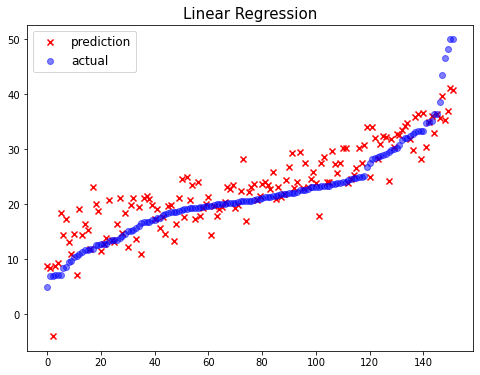

In [18]:
# 예측값과 실제값 각각의 scatter plot
plot_pred_actual(pred, y_test)

### 모델 평가(성능측정)


In [19]:
# import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# 이전에는 성능측정에 accuracy 사용했다면,
# 회귀 모델에서 성능을 측정하는 MAE, MSE, R2

# MAE: 절댓값
mae = mean_absolute_error(y_test, pred)

# MSE: 제곱
mse = mean_squared_error(y_test, pred)

# score = lr.score(x_test, y_test)
r2 = r2_score(y_test, pred)

print(f'r2 Score : {r2:.3f}')
print(f'MAE : {mae:.3f}')
print(f'MSE : {mse:.3f}')

# MAE, MSE는 오차값이기 때문에 낮을수록 좋은데,
# 하나의 값만을 가지고는 높은 값인지 낮은 값인지 확인 불가능
# 다른 값과의 비교가 필요 -> 이후에 자세히 다룰 것

r2 Score : 0.757
MAE : 3.214
MSE : 17.297


In [20]:
# 회귀계수 확인
import numpy as np

bias = np.round(lr.intercept_, 6)
weight = np.round(lr.coef_, 1) # 회귀계수를 weight 변수에 저장, 소수점 아래 첫 번째 자리까지 표시

print('Bias :', bias)
print('Weight :', weight) # 독립변수 12개에 대한 회귀계수 W 모두 출력

# 아래의 weight, bias일 때 최적의 결과

Bias : 40.995595
Weight : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [21]:
# 각 feature의 회귀계수가 얼마인지 Series에 담아 저장
coeff = pd.Series(data=weight, index=x_data.columns)
coeff

CRIM       -0.1
ZN          0.1
INDUS       0.0
CHAS        3.0
NOX       -19.8
RM          3.4
AGE         0.0
DIS        -1.7
RAD         0.4
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.6
dtype: float64

In [22]:
# coeff를 내림차순으로 정렬하고 sorted_value에 저장
sorted_values = coeff.sort_values(ascending=False)
sorted_values

# 회귀계수가 0인 변수는 주택 가격에 영향을 주지 않는 변수
# NOX 변수의 회귀계수가 매우 크게 나온 것 확인 가능

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

<AxesSubplot:>

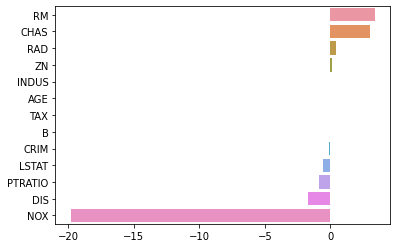

In [23]:
# 수평막대그래프: x=정렬된 회귀계수, y=컬럼명 (x, y 변수 모두 지정할 경우 수평막대그래프)
sns.barplot(x=sorted_values, y=sorted_values.index) # sorted_values는 숫자값, sorted_values.index는 변수명